In [3]:
import pandas as pd
import pymongo
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
client = pymongo.MongoClient('mongodb://localhost:27017')
db = client['admin']
collection = db['data_rain']
# Retrieve and convert the data
data = list(collection.find())
df1 = pd.DataFrame(data)
df1.head()

,_id,Location_id,time,precipitation_sum (mm)
0,652fe077f3c7661538eba085,1,25/09/2023,73.1
1,652fe077f3c7661538eba086,1,26/09/2023,2.1
2,652fe077f3c7661538eba087,1,27/09/2023,9.6
3,652fe077f3c7661538eba088,1,28/09/2023,9.2
4,652fe077f3c7661538eba089,1,29/09/2023,13.2


In [5]:
client = pymongo.MongoClient('mongodb://localhost:27017')
db = client['admin']
collection = db['data_lat_lon']
# Retrieve and convert the data
data = list(collection.find())
df2 = pd.DataFrame(data)
df2.head()

,_id,Location_id,Lat,Lon
0,652fe06ef3c7661538eae282,1,16.156202,108.249714
1,652fe06ef3c7661538eae283,2,16.156202,108.249996
2,652fe06ef3c7661538eae284,3,16.156202,108.250279
3,652fe06ef3c7661538eae285,4,16.155936,108.249431
4,652fe06ef3c7661538eae286,5,16.155936,108.249714


In [6]:
merged_df = pd.merge(df1, df2, on='Location_id', how='inner')
merged_df.to_csv('output.csv', index=False)

C:\Users\HON\AppData\Local\Temp\ipykernel_8244\1921957056.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  location_data['time'] = pd.to_datetime(location_data['time'])
C:\Users\HON\AppData\Local\Temp\ipykernel_8244\1921957056.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['time'] = pd.to_datetime(location_data['time'])


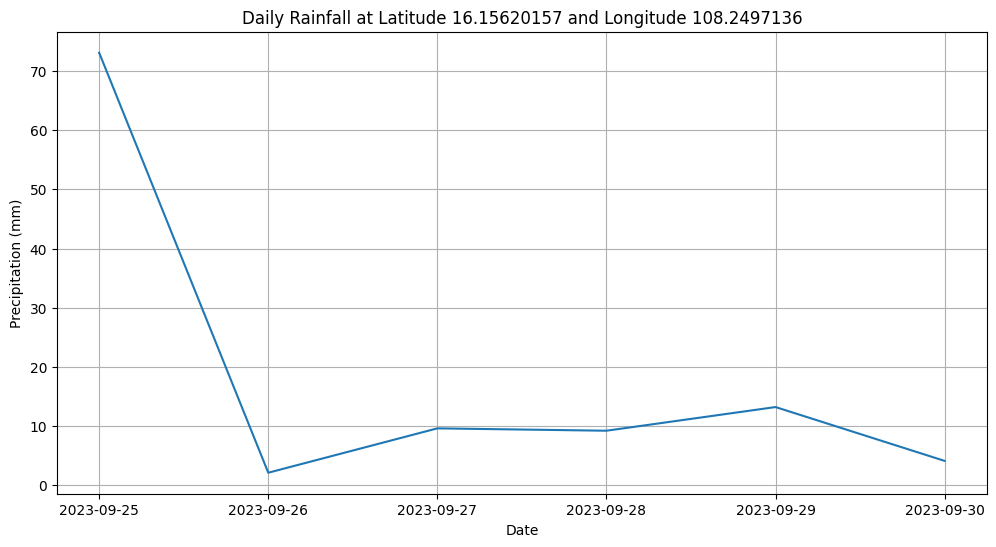

In [7]:
data = pd.read_csv('output.csv')

desired_lat = 16.15620157	

desired_lon = 108.2497136


location_data = data[(data['Lat'] == desired_lat) & (data['Lon'] == desired_lon)]
import matplotlib.pyplot as plt


location_data['time'] = pd.to_datetime(location_data['time'])


plt.figure(figsize=(12, 6))
plt.plot(location_data['time'], location_data['precipitation_sum (mm)'])
plt.title('Daily Rainfall at Latitude {} and Longitude {}'.format(desired_lat, desired_lon))
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)

plt.show()